In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
def getData(files):
    f = open("data/"+str(files), "r")
    f1 = f.readlines()
    del f1[0:4]
    a = np.asarray(f1)
    table = []
    for i in range(0, len(a)):
        b = a[i][0:-1].split('\t')
        c = np.asarray(map(float, b[0:3]))
        d = np.asarray(map(float, b[6:9]))
        e = np.concatenate((c,d))
        table.append(e)
    table = np.asarray(table)
    pd.set_option('display.float_format', lambda x: '%.6e' % x)
    df = pd.DataFrame(table, columns=['t0', 'v0', 'w0', 't1', 'v1', 'w1'])
    return df

In [5]:
def applyCut(inputDataframe, cut, text=None):
    dataframe = inputDataframe
    nbeforecut = dataframe.shape[0]
    cutDataframe = dataframe.query(cut)
    if text:
        print text, cutDataframe.shape[0], ' fraction kept: %2.1f'%(100.0*float(cutDataframe.shape[0])/nbeforecut)
    return cutDataframe

In [6]:
df_raw = getData('MUO_TimeResolution.dat')
df_raw.eval('dt = t1 - t0', inplace=True)

In [7]:
df = applyCut(df_raw, 'v0 > 0.05', 'v1 > 0.05')
df = applyCut(df, 'v1 > 0.05', 'v2 > 0.05')

v1 > 0.05 1358  fraction kept: 99.9
v2 > 0.05 969  fraction kept: 71.4


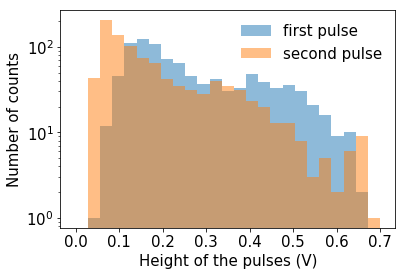

In [8]:
plt.hist(df['v0'], bins=25, range=(0,0.7), alpha=0.5, label='first pulse')
plt.hist(df['v1'], bins=25, range=(0,0.7), alpha=0.5, label='second pulse')
plt.xlabel('Height of the pulses (V)', fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel('Number of counts', fontsize=15)
plt.yticks(fontsize=15)
plt.yscale('log')
plt.legend(prop={'size': 15}, frameon=False, loc='best')

In [9]:
print np.mean(df['dt']), np.std(df['dt']), min(df['dt']), max(df['dt'])

3.397316821465428e-08 5.3788661065256924e-09 0.0 6e-08


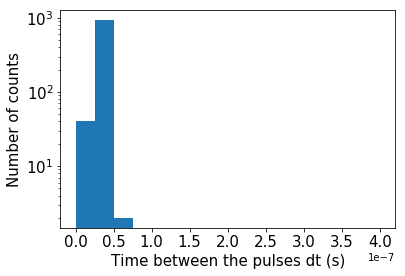

In [10]:
plt.hist(df['dt'], bins=16, range=(0,4e-7))
plt.xlabel('Time between the pulses dt (s)', fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel('Number of counts', fontsize=15)
plt.yticks(fontsize=15)
plt.yscale('log')

(array([  0.,  50., 100., 150., 200., 250., 300., 350.]),
 <a list of 8 Text yticklabel objects>)

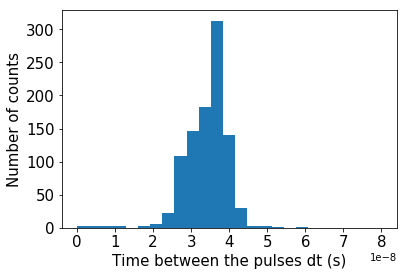

In [11]:
plt.hist(df['dt'], bins=25, range=(0,0.8e-7))
plt.xlabel('Time between the pulses dt (s)', fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel('Number of counts', fontsize=15)
plt.yticks(fontsize=15)

In [12]:
def gaus(x, mu, sigma):
    return 1/(np.sqrt(2*np.pi)*sigma)*np.exp(-(x - mu)**2/(2*sigma**2))

In [13]:
y, binEdges = np.histogram(df['dt']*1e6, bins=25, range=(0.0,0.08), density=True)
x = []
for i in range(len(y)):
    x.append((binEdges[i] + binEdges[i+1]) / 2)

In [14]:
popt, pcov = curve_fit(gaus, x, y) # pcov is the covariance matrix for the fit parameters

print 'Parameters of binned Gaussian fit: mean =','%.3f'%(popt[0]),'micro sec,',' standard dev =','%.3f'%(popt[1]),'micro sec,'\
       ' standard error (error on the mean) =', '%.4f'%(np.sqrt(pcov[0][0])), 'micro sec,', \
       'error on std dev =', '%.4f'%(np.sqrt(pcov[1][1])), 'micro sec'

Parameters of binned Gaussian fit: mean = 0.035 micro sec,  standard dev = 0.005 micro sec, standard error (error on the mean) = 0.0004 micro sec, error on std dev = 0.0003 micro sec


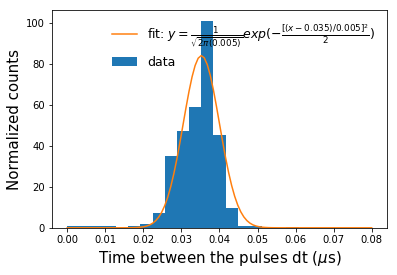

In [19]:
arange = np.arange(0, 0.0808, 0.0008)
plt.hist(df['dt']*1e6, bins=25, range=(0.0,0.08), normed=True, label='data')
plt.plot(arange, gaus(arange, popt[0],popt[1]), label=r'fit: $y = \frac{1}{\sqrt{2 \pi (0.005)}} exp(-\frac{[(x-0.035)/0.005]^2}{2})$')
plt.xlabel('Time between the pulses dt ($\mu$s)', fontsize=15)
plt.ylabel('Normalized counts', fontsize=15)
plt.legend(prop={'size': 12.5}, frameon=False, loc='upper right')